Implement hierarchical clustering on customer dataset. Determine the number of clusters using the
elbow method.
Dataset link :
https://www.kaggle.com/code/heeraldedhia/kmeans-clustering-for-customer-data/input

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [ ]:
df = pd.read_csv("Mall_Customers.csv", encoding="latin")

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# Select relevant features (e.g., Annual Income and Spending Score)
features = df[['Age','Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

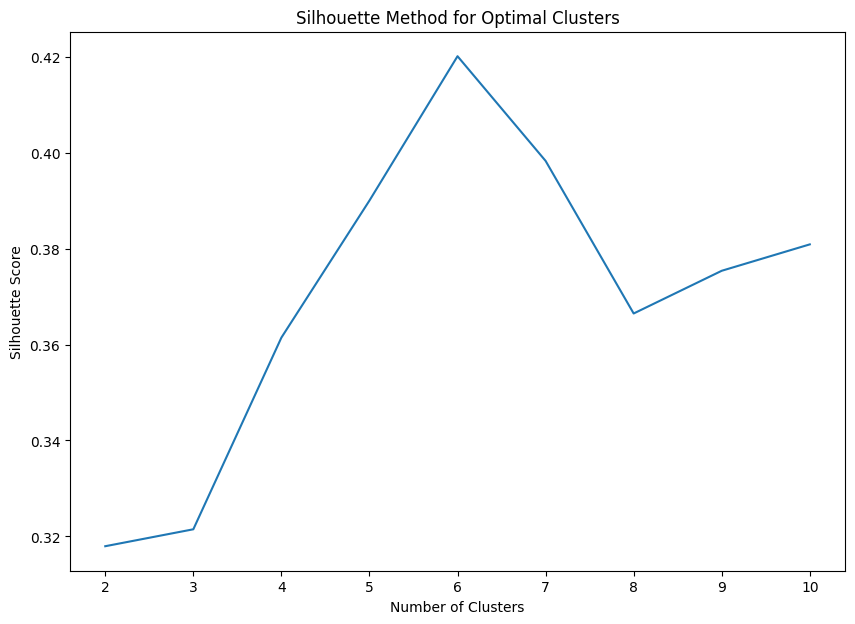

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters
    hc = AgglomerativeClustering(n_clusters=i, linkage='ward')
    labels = hc.fit_predict(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, labels))

plt.figure(figsize=(10, 7))
plt.plot(range(2, 11), silhouette_scores)  # Plot silhouette scores
plt.title('Silhouette Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

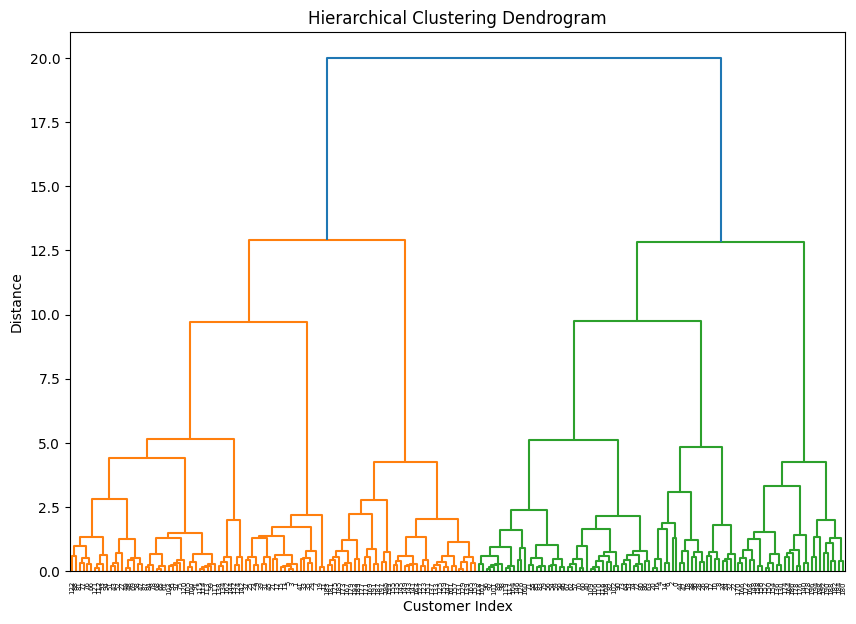

In [ ]:
# Perform hierarchical clustering
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Customer Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Choose the number of clusters (for example, 5)
n_clusters = 5

# Fit the model
hc = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
df['Cluster'] = hc.fit_predict(scaled_features)

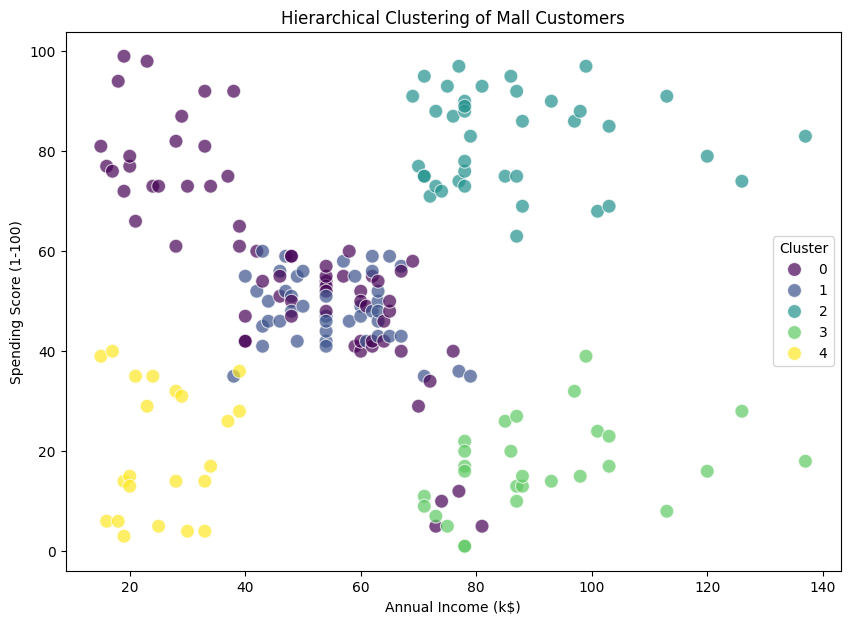

In [ ]:
# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=features['Annual Income (k$)'], y=features['Spending Score (1-100)'],
                hue=df['Cluster'], palette='viridis', s=100, alpha=0.7)
plt.title('Hierarchical Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

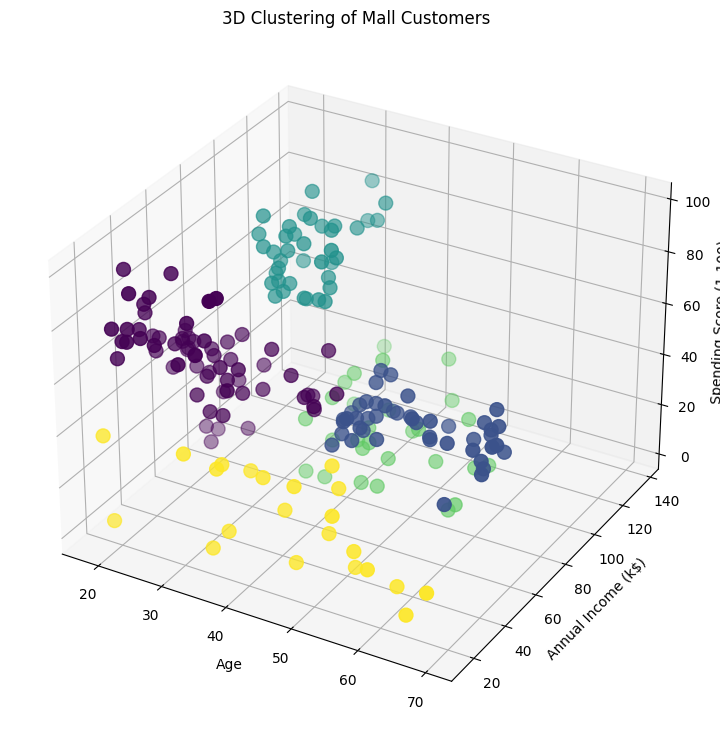

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features['Age'], features['Annual Income (k$)'], features['Spending Score (1-100)'],
            c=df['Cluster'], cmap='viridis', s=100)
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Clustering of Mall Customers')
plt.show()


In [ ]:
# Analyze cluster means
cluster_means = df.groupby('Cluster')[['Age','Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_means)

               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        26.560606           47.363636               56.787879
1        56.400000           55.288889               48.355556
2        32.692308           86.538462               82.128205
3        43.892857           91.285714               16.678571
4        44.318182           25.772727               20.272727


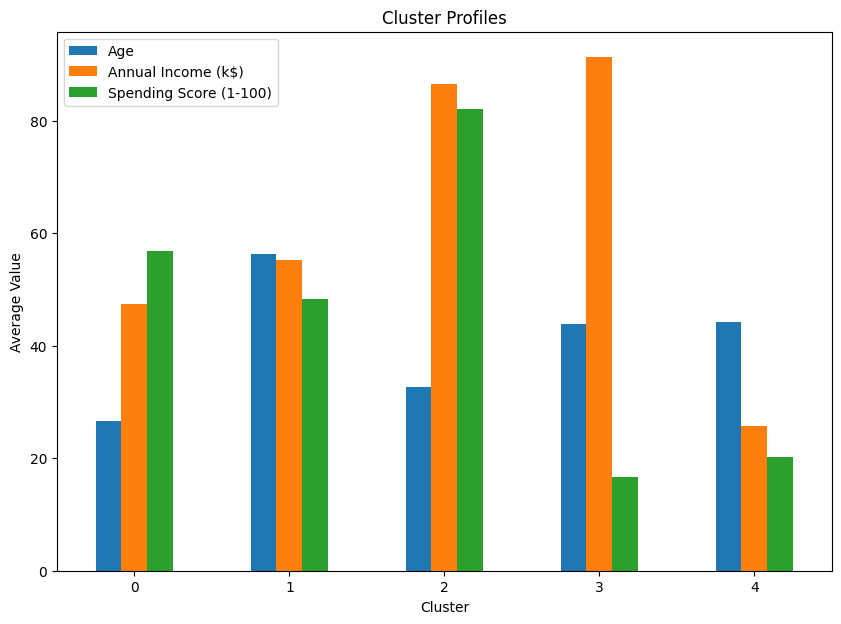

In [ ]:
cluster_means = df.groupby('Cluster')[['Age','Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_means.plot(kind='bar', figsize=(10, 7))
plt.title('Cluster Profiles')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.show()


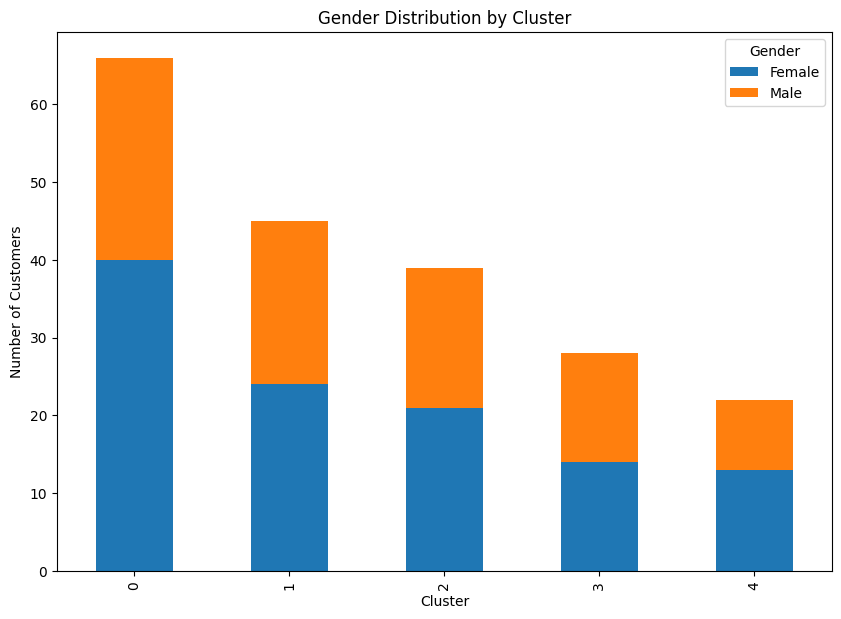

In [ ]:
# Assuming there is a categorical feature, e.g., 'Gender'
gender_counts = df.groupby(['Cluster', 'Gender']).size().unstack() # Reverted 'cluster' back to 'Cluster'
gender_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.title('Gender Distribution by Cluster')
plt.ylabel('Number of Customers')
plt.xlabel('Cluster')
plt.show()
